In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Import Data

In [46]:
valid_data = pd.read_csv('valid_data.csv')
valid_data.head(5)

,fname,label,manually_verified,Duration
0,00044347.wav,Hi-hat,0,14.00
1,001ca53d.wav,Saxophone,1,10.32
2,0033e230.wav,Glockenspiel,1,8.00
3,00353774.wav,Cello,1,4.52
4,003b91e8.wav,Cello,0,13.28


In [47]:
valid_data.shape

(5580, 4)

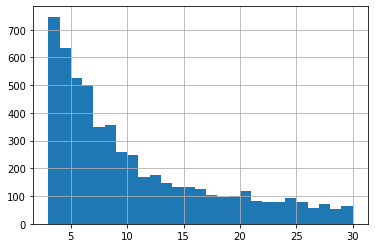

In [48]:
valid_data['Duration'].hist(bins = 27)

# Change duration for spectrogram

In [49]:
# Example of a Hi Hat spectrogram
y, sr = librosa.load('audio_train/00044347.wav', duration=10.00)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 431)

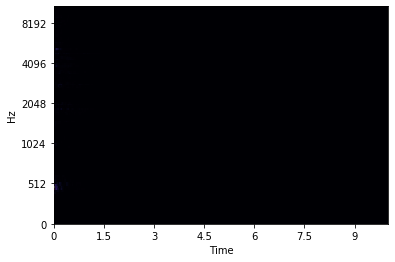

In [50]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [72]:
# Example of a Hi Hat spectrogram
y, sr = librosa.load('audio_train/001ca53d.wav', duration=5.00)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 216)

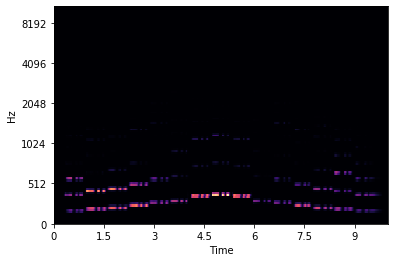

In [54]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

# Create spectrograms for all data 

# ADJUST DURATION + SHAPE + VERIFIED

In [68]:
valid_data['path'] = 'audio_train/' + valid_data['fname']
valid_data.head(20)

,fname,label,manually_verified,Duration,path
0,00044347.wav,Hi-hat,0,14.00,audio_train/00044347.wav
1,001ca53d.wav,Saxophone,1,10.32,audio_train/001ca53d.wav
2,0033e230.wav,Glockenspiel,1,8.00,audio_train/0033e230.wav
3,00353774.wav,Cello,1,4.52,audio_train/00353774.wav
4,003b91e8.wav,Cello,0,13.28,audio_train/003b91e8.wav
5,004ad66f.wav,Clarinet,0,7.00,audio_train/004ad66f.wav
6,0063ab88.wav,Computer_keyboard,0,29.64,audio_train/0063ab88.wav
7,0075d39c.wav,Keys_jangling,0,20.64,audio_train/0075d39c.wav
8,0079d310.wav,Writing,0,4.06,audio_train/0079d310.wav
9,0091fc7f.wav,Cello,1,5.70,audio_train/0091fc7f.wav


In [69]:
new = valid_data.head(20)

In [73]:
D = [] # Dataset

for row in new.itertuples():
    y, sr = librosa.load(row.path, duration= 5.00)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 216): continue
    D.append( (ps, row.label) )

In [74]:
print("Number of samples: ", len(D))

Number of samples:  15
